**Analysis on Batch Test Scores**

This is an open-ended problem. You are supposed to give insights about the three different batches for which the score data has been provided to you.

Import Library and Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
from matplotlib import pyplot as plt
path="/content/drive/MyDrive/scores_data.csv"
df = pd.read_csv(path)
df.describe


<bound method NDFrame.describe of          Batch  User_ID     Score   
0    AI_ELITE_7  uid_149       6 / 7
1    AI_ELITE_7  uid_148       6 / 7
2    AI_ELITE_7  uid_147       7 / 7
3    AI_ELITE_7  uid_146       7 / 7
4    AI_ELITE_7  uid_145       4 / 7
..          ...      ...         ...
144  AI_ELITE_4    uid_5       4 / 7
145  AI_ELITE_4    uid_4       4 / 7
146  AI_ELITE_4    uid_3       4 / 7
147  AI_ELITE_4    uid_2       3 / 7
148  AI_ELITE_4    uid_1       2 / 7

[149 rows x 3 columns]>

Data Description :
Batch - Represents the Batch Name

User_ID - Represents the unique student id

Score - Represents the Score out of 7

In [ ]:
df.head(149)

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7
...,...,...,...
144,AI_ELITE_4,uid_5,4 / 7
145,AI_ELITE_4,uid_4,4 / 7
146,AI_ELITE_4,uid_3,4 / 7
147,AI_ELITE_4,uid_2,3 / 7


In [ ]:
df.dtypes

Batch          object
User_ID        object
   Score       object
dtype: object

In [ ]:
df.shape


(149, 3)

In [ ]:
#Detect missing values
df.describe(include = "all")

,Batch,User_ID,Score
count,149,149,149
unique,3,149,8
top,AI_ELITE_7,uid_149,4 / 7
freq,53,1,40


In [4]:
# % of missing values per variable/column
df.isna().sum()/len(df)

Batch          0.0
User_ID        0.0
   Score       0.0
dtype: float64

In [5]:
df.columns

Index(['Batch ', 'User_ID ', '   Score   '], dtype='object')

In [6]:
df.columns = df.columns.str.strip()

In [7]:
df.columns

Index(['Batch', 'User_ID', 'Score'], dtype='object')

In [8]:
df.Batch.nunique()

3

In [9]:
df.Score.nunique()

8

In [10]:
df.describe().T

,count,unique,top,freq
Batch,149,3,AI_ELITE_7,53
User_ID,149,149,uid_149,1
Score,149,8,4 / 7,40


In [11]:
df.Score.unique()

array(['6 / 7', '7 / 7', '4 / 7', '5 / 7', '3 / 7', '2 / 7', '0 / 7',
       '1 / 7'], dtype=object)

In [12]:
df['Score'] = df['Score'].str.replace(' / 7', '')
df['Score'] = df['Score'].astype('int')

In [20]:
df.Score.unique()

array([6, 7, 4, 5, 3, 2, 0, 1])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Batch    149 non-null    object
 1   User_ID  149 non-null    object
 2   Score    149 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.6+ KB


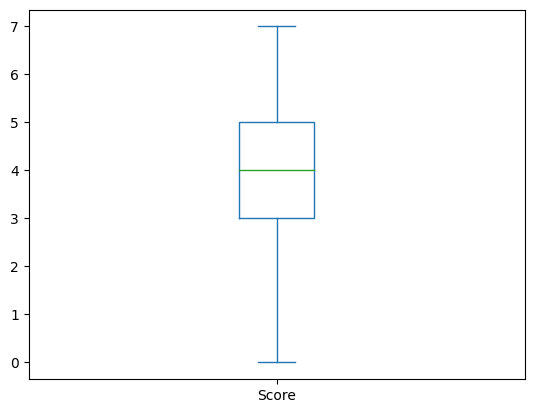

In [14]:
df.Score.plot(kind='box');

In [15]:
df.Batch.unique()

array(['AI_ELITE_7', 'AI_ELITE_6', 'AI_ELITE_4'], dtype=object)

In [21]:
df_1 = df[df.Batch == "AI_ELITE_4"]
df_2 = df[df.Batch == "AI_ELITE_6"]
df_3 = df[df.Batch == "AI_ELITE_7"]

In [23]:
df_1.nunique()


Batch       1
User_ID    48
Score       8
dtype: int64

In [24]:
df_2.nunique()


Batch       1
User_ID    48
Score       8
dtype: int64

In [25]:
df_3.nunique()

Batch       1
User_ID    53
Score       6
dtype: int64

Batch - AI_ELITE_4

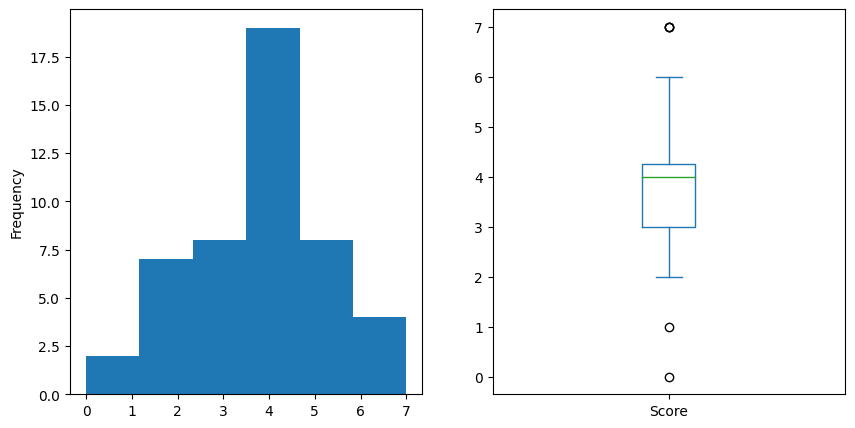

In [26]:
plt.figure(figsize=(10,5))
plt.subplot(121)
df_1.Score.plot(kind='hist',bins=6);
plt.subplot(122)
df_1.Score.plot(kind='box');

Batch - AI_ELITE_6

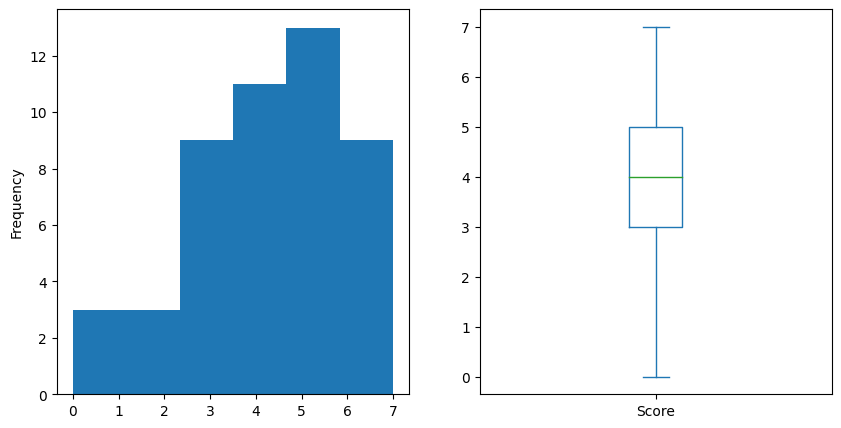

In [27]:
plt.figure(figsize=(10,5))
plt.subplot(121)
df_2.Score.plot(kind='hist',bins=6);
plt.subplot(122)
df_2.Score.plot(kind='box');

Batch - AI_ELITE_7

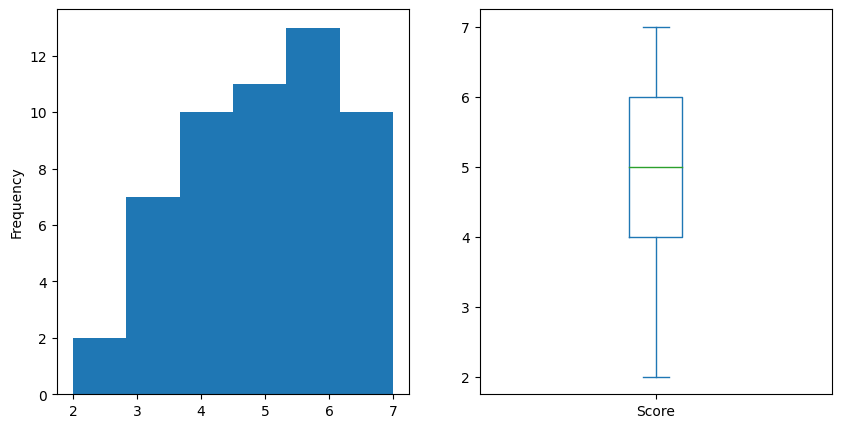

In [29]:
plt.figure(figsize=(10,5))
plt.subplot(121)
df_3.Score.plot(kind='hist',bins=6);
plt.subplot(122)
df_3.Score.plot(kind='box');

high and low scores of students

In [30]:
high_score = df[df.Score >= 6]
high_score.User_ID.count()

36

In [31]:
low_score = df[df.Score <= 2]
low_score.User_ID.count()

17

AI_ELITE_4 Batch Comparison of high and low scores of students

In [32]:
high_score1 = df_1[df_1.Score >= 6]
high_score1.User_ID.count()

4

In [33]:
low_score1 = df_1[df_1.Score <= 2]
low_score1.User_ID.count()

9

AI_ELITE_6 Batch Comparison of high and low scores of students

In [34]:
high_score2 = df_2[df_2.Score >= 6]
high_score2.User_ID.count()

9

In [35]:
low_score2 = df_2[df_2.Score <= 2]
low_score2.User_ID.count()

6

AI_ELITE_7 Batch Comparison of high and low scores of students

In [36]:
high_score3 = df_3[df_3.Score >= 6]
high_score3.User_ID.count()

23

In [37]:
low_score3 = df_3[df_3.Score <= 2]
low_score3.User_ID.count()

2

Observation:
Batch AI_ELITE_7 has the best performance.

In [38]:
top_score = df[df.Score == 7]
top_score

,Batch,User_ID,Score
2,AI_ELITE_7,uid_147,7
3,AI_ELITE_7,uid_146,7
5,AI_ELITE_7,uid_144,7
7,AI_ELITE_7,uid_142,7
15,AI_ELITE_7,uid_134,7
16,AI_ELITE_7,uid_133,7
17,AI_ELITE_7,uid_132,7
19,AI_ELITE_7,uid_130,7
24,AI_ELITE_7,uid_125,7
35,AI_ELITE_7,uid_114,7


In [39]:
bottom_score = df[df.Score <= 1]
bottom_score

,Batch,User_ID,Score
68,AI_ELITE_6,uid_81,0
71,AI_ELITE_6,uid_78,1
97,AI_ELITE_6,uid_52,1
129,AI_ELITE_4,uid_20,1
135,AI_ELITE_4,uid_14,0
